# Fish Dataset

Content:

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
# Loading Dataset:
data = pd.read_csv('Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [109]:
# Data PreProcessing:
# 1. Null value Imputation:

data.isnull().sum() / len(data)

Species    0.0
Weight     0.0
Length1    0.0
Length2    0.0
Length3    0.0
Height     0.0
Width      0.0
dtype: float64

In [110]:
# Extracting numerical data from the dataset:
num_data = data.select_dtypes(include = np.number)
num_data.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [111]:
# Statistical description about numerical dataset:
num_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [112]:
# Weight is out target variable, it should not be zero. Its filled as zero because of null values. 
# To proceed further need to impute null values

In [113]:
data[data['Weight'] == 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [114]:
# only one row having weight is zero so we can drop it.
d1 = data.drop(index = 40, axis = 0)
d1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [115]:
# numercial data statstical analysis:
num_data_mod = d1.select_dtypes(include = np.number)
num_data_mod.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [116]:
cat_data = d1.select_dtypes(include = object)
cat_data.describe()

,Species
count,158
unique,7
top,Perch
freq,56


In [117]:
# Encode the categorical column of species:
freq = d1['Species'].value_counts(normalize = True)
d1['Species'] = d1['Species'].map(freq)

In [118]:
d1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0.221519,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0.221519,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0.221519,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0.221519,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0.221519,430.0,26.5,29.0,34.0,12.4440,5.1340


C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


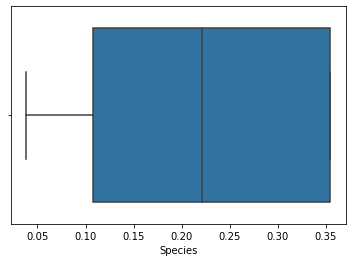

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


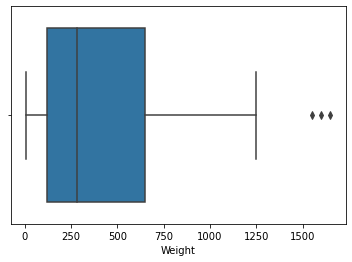

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


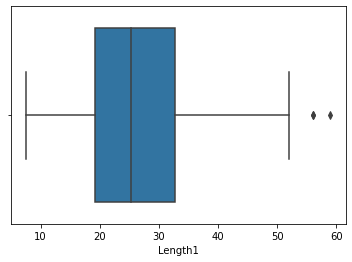

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


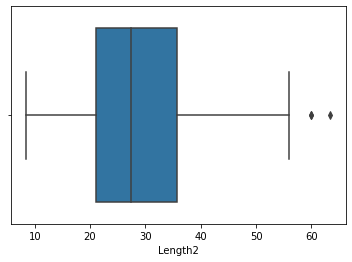

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


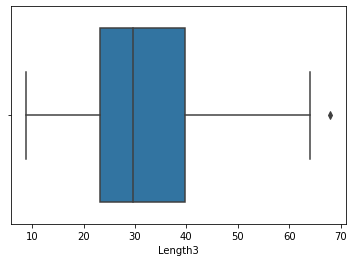

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


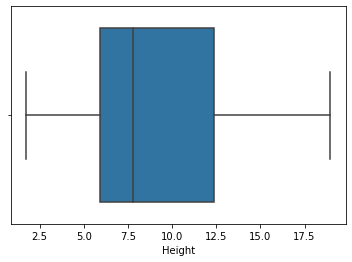

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


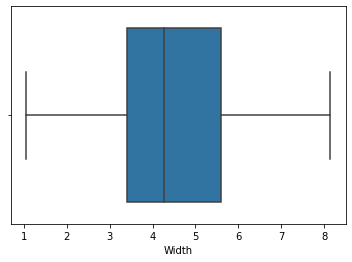

In [119]:
# Check for outliers:
for i in d1.columns:
    sns.boxplot(d1[i])
    plt.show()

In [120]:
# From the above boxplot we can conclude that there are some outliers. To get good model performance treating outliers 
# before building the model by the method of Capping.

for i in d1.columns:
    q1 = d1[i].quantile(0.25)
    q3 = d1[i].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    uc = d1[i].quantile(0.99)
    lc = d1[i].quantile(0.01)
    for j in d1[i].index:
        if d1.loc[j,i] > ub:
            d1.loc[j,i] = uc
        if d1.loc[j,i] < lc:
            d1.loc[j,i] = lc

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


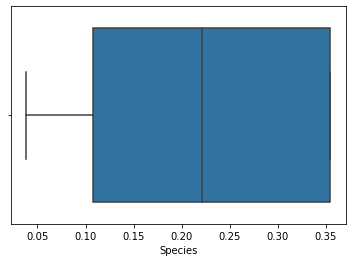

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


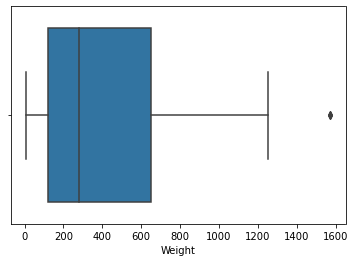

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


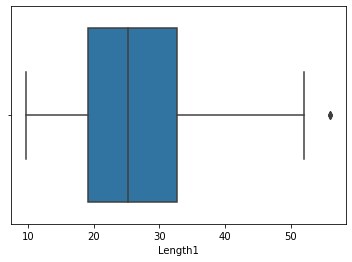

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


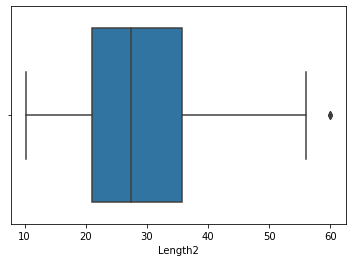

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


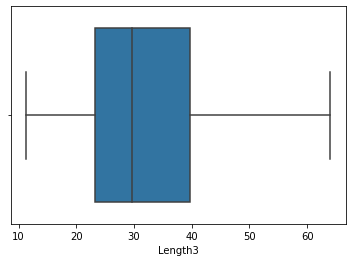

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


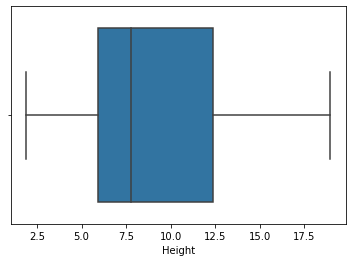

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


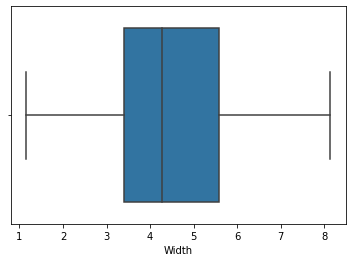

In [121]:
# recheck for outlier:
for i in d1.columns:
    sns.boxplot(d1[i])
    plt.show()

In [122]:
# Comparing before capping, outlier is greatly reduced to build the model

In [123]:
# now the dataset is ready to build linear regression model:

In [124]:
import scipy.stats as stats
import statsmodels.api as sm

In [125]:
# considering Weight as the Target column, and all others are independent variable.

# building OLS model:

inp = d1.drop('Weight',axis = 1)
out = d1['Weight']

inpc = sm.add_constant(inp)

ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           1.59e-69
Time:                        23:19:11   Log-Likelihood:                -977.98
No. Observations:                 158   AIC:                             1970.
Df Residuals:                     151   BIC:                             1991.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -465.1005     35.152    -13.231      0.000    -534.553    -395.648
Species     -170.7865    114.268     -1.495      0.137    -396.557      54.984
Length1       66.8794     41.406      1.615      0.108     -14.930     148.689
Length2        0.6735     45.431      0.015      0.988     -89.088      90.435
Length3      -41.5745     19.020     -2.186      0.030     -79.155      -3.994
Height        32.0720      8.769      3.657      0.000      14.746      49.398
Width         30.8605     20.386      1.514      0.132      -9.419      71.140
==============================================================================
Omnibus:                       20.950   Durbin-Watson:                   0.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.754
Skew:                           0.762   Prob(JB):                     5.70e-07
Kurtosis:                       4.430   Cond. No.                         673.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
# From the above summary r-square value is 0.889, which 88.9%. fstat pvalue < 0.05. Therefore overall model is significant

# check for 5 assumption for building final model.

In [127]:
# 1. Check for multicollinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
inp1 = inp - inp.mean() # partial scaling

In [129]:
inp1c = sm.add_constant(inp1)

ols = sm.OLS(out,inp1c)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           1.59e-69
Time:                        23:19:12   Log-Likelihood:                -977.98
No. Observations:                 158   AIC:                             1970.
Df Residuals:                     151   BIC:                             1991.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        400.3136      9.604     41.683      0.000     381.338     419.289
Species     -170.7865    114.268     -1.495      0.137    -396.557      54.984
Length1       66.8794     41.406      1.615      0.108     -14.930     148.689
Length2        0.6735     45.431      0.015      0.988     -89.088      90.435
Length3      -41.5745     19.020     -2.186      0.030     -79.155      -3.994
Height        32.0720      8.769      3.657      0.000      14.746      49.398
Width         30.8605     20.386      1.514      0.132      -9.419      71.140
==============================================================================
Omnibus:                       20.950   Durbin-Watson:                   0.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.754
Skew:                           0.762   Prob(JB):                     5.70e-07
Kurtosis:                       4.430   Cond. No.                         230.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# For the above model vif can be:
r2 = 0.889
vif = 1 / (1 - r2)
vif

# VIF value should be < 9 to statisfy the multicollinearity

9.00900900900901

In [131]:
# To check for VIF:

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp1c.values,i) for i in range(inp1c.shape[1])]
vif['Features'] = inp1c.columns
vif.sort_values('VIF',ascending = False)

,VIF,Features
3,2517.028267,Length2
2,1818.514710,Length1
4,517.014541,Length3
5,15.263156,Height
6,12.753950,Width
1,1.882506,Species
0,1.000000,const


In [132]:
# VIF value for length2 is > 9. so we can drop and recheck the vif again with remain features.

inpv1 = inp1.drop('Length2',axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]
vif['Features'] = inpv1.columns
vif.sort_values('VIF',ascending = False)

,VIF,Features
2,379.355756,Length3
1,352.240450,Length1
3,14.798121,Height
4,12.279462,Width
0,1.524724,Species


In [133]:
# VIF value for length3 is > 9. so we can drop and recheck the vif again with remain features.

inpv2 = inpv1.drop('Length3',axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv2.values,i) for i in range(inpv2.shape[1])]
vif['Features'] = inpv2.columns
vif.sort_values('VIF',ascending = False)

,VIF,Features
3,9.564111,Width
1,5.242437,Length1
2,3.059649,Height
0,1.410037,Species


In [134]:
# VIF value for width is > 9. so we can drop and recheck the vif again with remain features.

inpv3 = inpv2.drop('Width',axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv3.values,i) for i in range(inpv3.shape[1])]
vif['Features'] = inpv3.columns
vif.sort_values('VIF',ascending = False)

,VIF,Features
2,1.662965,Height
1,1.645300,Length1
0,1.016596,Species


In [135]:
# Above Dataframe statisfy the multicollinearity assumption.

# building model with above listed input.

inpc = sm.add_constant(inpv3)

ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     367.7
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           5.73e-70
Time:                        23:19:17   Log-Likelihood:                -985.99
No. Observations:                 158   AIC:                             1980.
Df Residuals:                     154   BIC:                             1992.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        400.3136     10.004     40.014      0.000     380.550     420.077
Species       63.9403     87.474      0.731      0.466    -108.863     236.744
Length1       27.1593      1.297     20.934      0.000      24.596      29.722
Height        20.7345      3.015      6.877      0.000      14.778      26.691
==============================================================================
Omnibus:                        5.916   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.476
Skew:                           0.421   Prob(JB):                       0.0647
Kurtosis:                       3.352   Cond. No.                         90.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
# 2. Check for normality:

ols_mod.resid.skew()

# Skew range should be within -0.5 to 0.5. Therefore normality check also statisfied. 
# To check how data is distributed, use density plot

0.4246895360402113

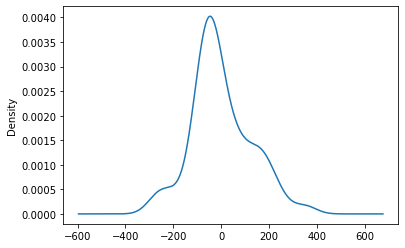

In [137]:
ols_mod.resid.plot(kind = 'density')
plt.show()

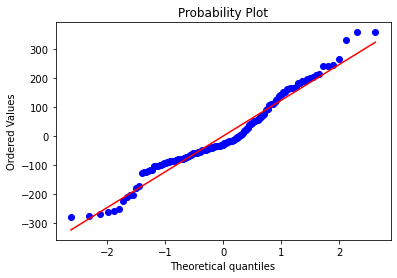

In [138]:
stats.probplot(ols_mod.resid,plot = plt)
plt.show()

In [139]:
# From the above Probability plot and density plot we can conclude that, Data is normally distributed.

In [34]:
# check for linearity:
# H0 : Part of data is accepted
from statsmodels.stats.diagnostic import linear_rainbow

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

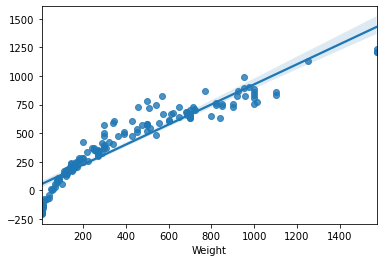

In [140]:
inpc = sm.add_constant(inpv3)

ypred = ols_mod.predict(inpc)
sns.regplot(out,ypred)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


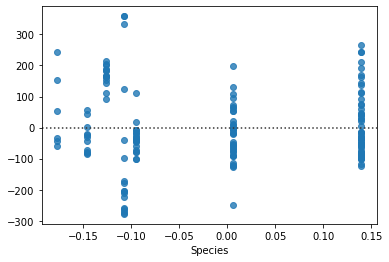

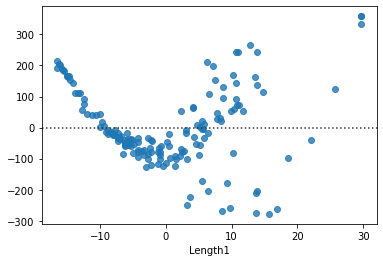

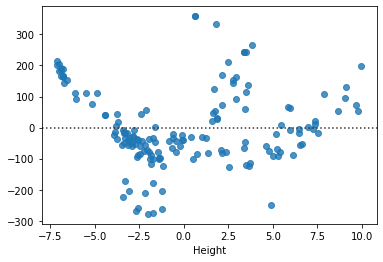

In [141]:
for i in inpv3.columns:
    sns.residplot(inpv3[i],ols_mod.resid)
    plt.show()

In [35]:
# H0 : Part of the data is linear
linear_rainbow(res = ols_mod, frac = 0.5)

(4.472431982401296, 2.2002838580602098e-10)

In [36]:
# From the above regplot we can notice some non-linear method exist.
# From the above resiplot we can notice that there is no clear random distribution of points with respect to zero residue line.

# in the above linear rainbow test, pvalue < 0.05. Linearity check fails. 
# To make it statisfy transforming input and output variables.

In [43]:
# Tranform the input and output features:
Length1_tr,lam=stats.boxcox(d1['Length1'])
pd.DataFrame(Length1_tr).skew()
d1['Length1'] = Length1_tr

In [44]:
Height_tr,lam = stats.boxcox(d1['Height'])
pd.DataFrame(Height_tr).skew()
d1['Height'] = Height_tr

In [42]:
d1['Weight'] = np.sqrt(d1['Weight'])

In [53]:
d1['Species'] = np.sqrt(d1['Species']).skew()

In [46]:
d1.dtypes

Species    float64
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [54]:
# building model with transformed input and output:
inp = d1.drop('Weight',axis = 1)
out = d1['Weight']

inpc = sm.add_constant(inp)

ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2559.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          9.86e-145
Time:                        20:54:52   Log-Likelihood:                -221.79
No. Observations:                 158   AIC:                             455.6
Df Residuals:                     152   BIC:                             474.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Species      -60.9820      9.757     -6.250      0.000     -80.259     -41.705
Length1       -5.9760      0.523    -11.437      0.000      -7.008      -4.944
Length2        1.1187      0.164      6.825      0.000       0.795       1.443
Length3        0.0319      0.132      0.241      0.810      -0.230       0.294
Height         1.4517      0.182      7.986      0.000       1.093       1.811
Width          2.1619      0.171     12.608      0.000       1.823       2.501
==============================================================================
Omnibus:                       12.606   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.391
Skew:                           0.093   Prob(JB):                     3.40e-08
Kurtosis:                       5.278   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


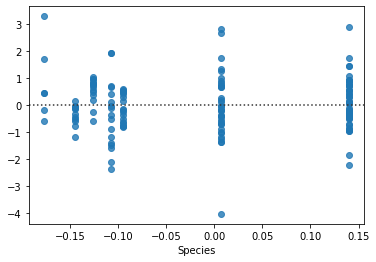

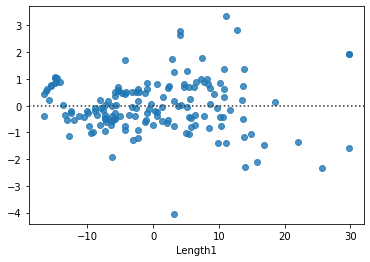

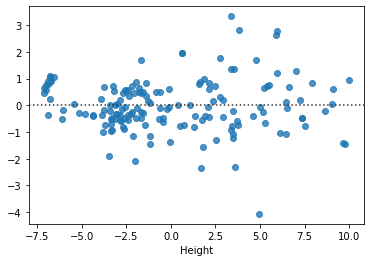

In [60]:
for i in inpv3.columns:
    sns.residplot(inpv3[i],ols_mod.resid)
    plt.show()

In [ ]:
# No clear Pattern is formed. Linearity Assumption is statisfied.

In [56]:
# 4. Check for autocorrelation:
# From the above ols model Durbin-watson test value is between 1.5 to 2.0. Therefore there is no autocorrelation. we can conclude that autocorrelation is statisfied.

In [57]:
# 5. Check for Homoscadacity:
from statsmodels.stats.api import het_goldfeldquandt

In [58]:
het_goldfeldquandt(ols_mod.resid,inpv3)

# pvalue is > 0.05. so we can conclude that Homoscadacity assumtion is statisfied.

(1.0037826556685872, 0.4934564200664434, 'increasing')

In [61]:
# All the five assumptions are statisfied. so we can proceed with feature selection technique.

In [62]:
# Feature Selection Method: Forward Selection, Backward Elimination, RFE.


from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
# Forward Selection:
lr = LinearRegression()

lr_forward = sfs(estimator = lr, k_features = 'best', forward = True, scoring = 'r2')
sfs_forward = lr_forward.fit(inpv3,out)

feat_forward = (sfs_forward.k_feature_names_)
feat_forward = list(feat_forward)

print(feat_forward)

['Species', 'Length1', 'Height']


In [65]:
# Backward Elimination:
lr = LinearRegression()

lr_backward = sfs(estimator = lr, k_features = 'best', forward = False, scoring = 'r2')
sfs_backward = lr_backward.fit(inpv3,out)

feat_backward = (sfs_backward.k_feature_names_)
feat_backward = list(feat_backward)

print(feat_backward)

['Species', 'Length1', 'Height']


In [66]:
# RFE:
from sklearn.feature_selection import RFECV

In [68]:
lr = LinearRegression()

rfecv = RFECV(estimator = lr)
rfe_mod = rfecv.fit(inpv3,out)
rfe_mod.ranking_

rank = pd.DataFrame()
rank['Feature'] = inpv3.columns
rank['Rank'] = rfe_mod.ranking_
rank

,Feature,Rank
0,Species,1
1,Length1,1
2,Height,1


In [70]:
feat_rfe = rank[rank['Rank'] == 1]['Feature']
feat_rfe = list(feat_rfe)
feat_rfe

['Species', 'Length1', 'Height']

In [72]:
# Report card:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [81]:
# forward selection:
xtrain,xtest,ytrain,ytest = train_test_split(inpv3,out,test_size = 0.3, random_state = 10)

lr = LinearRegression()
lr.fit(xtrain[feat_forward],ytrain)

ypred_train = lr.predict(xtrain[feat_forward])
ypred_test = lr.predict(xtest[feat_forward])

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

mse_train = mean_squared_error(ytrain,ypred_train)
mse_test = mean_squared_error(ytest,ypred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

rse_forward = [r2_train,r2_test,rmse_train,rmse_test]
rse_forward

[0.9744863111207096, 0.9591945363546832, 1.4906913273279052, 1.677888735860096]

In [82]:
# Backward Elimination:
xtrain,xtest,ytrain,ytest = train_test_split(inpv3,out,test_size = 0.3, random_state = 10)

lr = LinearRegression()
lr.fit(xtrain[feat_backward],ytrain)

ypred_train = lr.predict(xtrain[feat_backward])
ypred_test = lr.predict(xtest[feat_backward])

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

mse_train = mean_squared_error(ytrain,ypred_train)
mse_test = mean_squared_error(ytest,ypred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

rse_backward = [r2_train,r2_test,rmse_train,rmse_test]
rse_backward

[0.9744863111207096, 0.9591945363546832, 1.4906913273279052, 1.677888735860096]

In [83]:
# RFE:
xtrain,xtest,ytrain,ytest = train_test_split(inpv3,out,test_size = 0.3, random_state = 10)

lr = LinearRegression()
lr.fit(xtrain[feat_rfe],ytrain)

ypred_train = lr.predict(xtrain[feat_rfe])
ypred_test = lr.predict(xtest[feat_rfe])

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

mse_train = mean_squared_error(ytrain,ypred_train)
mse_test = mean_squared_error(ytest,ypred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

rse_rfe = [r2_train,r2_test,rmse_train,rmse_test]
rse_rfe

[0.9744863111207096, 0.9591945363546832, 1.4906913273279052, 1.677888735860096]

In [86]:
# Scorecard:

scorecard = pd.DataFrame()
scorecard['Forward'] = rse_forward
scorecard['Backward'] = rse_backward
scorecard['RFE'] = rse_rfe
scorecard.index = ['R2_train','R2_test','RMSE_train','RMSE_test']
scorecard

,Forward,Backward,RFE
R2_train,0.974486,0.974486,0.974486
R2_test,0.959195,0.959195,0.959195
RMSE_train,1.490691,1.490691,1.490691
RMSE_test,1.677889,1.677889,1.677889


In [89]:
# to find bias error: R2_train - R2_test. 
be = 0.974486 - 0.959195
print('Bias Error :',be)

Bias Error : 0.015290999999999944


In [90]:
# Cross Validation: to check overfitting nature of the model:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

score = cross_val_score(lr, inpv3, out, cv = 5, scoring = 'r2')

avg_score = np.mean(score)
var_error = np.std(score)
coeff_error = np.std(score) / np.mean(score)

print(avg_score, var_error, coeff_error)


0.8445763711961745 0.09419643497265823 0.11153098545635098


In [ ]:
# from the above result, variance error is 11.1%. comparing with bias error, variance error is high.
# Model is facing underfitting problem. To overcome this underfitting problem "regularization"

In [92]:
# Regularization by GridSearchCV:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [93]:
# Ridge Method:
para = {'alpha' : [0.00001,0.001,0.001,0.01,0.1,0.2,0.5,1,2,5,10,20,30,50,100]}

rid = Ridge(normalize = True)
grid = GridSearchCV(rid, param_grid = para, scoring = 'r2', cv = 5)
mod_grid = grid.fit(xtrain,ytrain)

In [94]:
# To find the best Parameter:
mod_grid.best_params_

{'alpha': 0.001}

In [95]:
# To find best score:
mod_grid.best_score_

0.9700073118459338

In [96]:
# To get result:
pd.DataFrame(mod_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.058180,0.116361,0.007083,0.007139,1e-05,{'alpha': 1e-05},0.985976,0.946066,0.983979,0.959859,0.974136,0.970003,0.015122,3
1,0.006251,0.007656,0.000000,0.000000,0.001,{'alpha': 0.001},0.986020,0.946141,0.983983,0.959795,0.974096,0.970007,0.015115,1
2,0.006250,0.007654,0.003126,0.006252,0.001,{'alpha': 0.001},0.986020,0.946141,0.983983,0.959795,0.974096,0.970007,0.015115,1
3,0.003125,0.006250,0.006250,0.007655,0.01,{'alpha': 0.01},0.986388,0.946743,0.983962,0.959185,0.973700,0.969996,0.015067,4
4,0.006251,0.007655,0.003125,0.006250,0.1,{'alpha': 0.1},0.986661,0.946759,0.978840,0.950758,0.966586,0.965921,0.015457,5
5,0.006250,0.007655,0.006251,0.007655,0.2,{'alpha': 0.2},0.981432,0.938770,0.966490,0.937940,0.954066,0.955740,0.016633,6
6,0.003125,0.006250,0.003125,0.006250,0.5,{'alpha': 0.5},0.945486,0.894382,0.912595,0.887797,0.903017,0.908656,0.020212,7
7,0.006250,0.007655,0.003125,0.006250,1,{'alpha': 1},0.860364,0.805245,0.813266,0.792905,0.808533,0.816062,0.023153,8
8,0.006250,0.007655,0.003125,0.006251,2,{'alpha': 2},0.697797,0.652055,0.648836,0.626562,0.649432,0.654937,0.023315,9
9,0.005751,0.007712,0.005526,0.005282,5,{'alpha': 5},0.413269,0.401697,0.385440,0.345371,0.391908,0.387537,0.023083,10


In [97]:
# Lasso Method:
para = {'alpha' : [0.00001,0.001,0.001,0.01,0.1,0.2,0.5,1,2,5,10,20,30,50,100]}

Las = Lasso(normalize = True)
grid = GridSearchCV(Las, param_grid = para, scoring = 'r2', cv = 5)
mod_grid = grid.fit(xtrain,ytrain)

In [98]:
# To find the best Parameter:
mod_grid.best_params_

{'alpha': 1e-05}

In [99]:
# To find best score:
mod_grid.best_score_

0.9700032359571671

In [100]:
# To get result:
pd.DataFrame(mod_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043683,0.072082,0.006229,0.007629,1e-05,{'alpha': 1e-05},0.985976,0.946060,0.983979,0.959864,0.974137,0.970003,0.015124,1
1,0.006250,0.007655,0.000000,0.000000,0.001,{'alpha': 0.001},0.986169,0.945765,0.983989,0.959971,0.974070,0.969993,0.015242,2
2,0.006250,0.007655,0.006250,0.007655,0.001,{'alpha': 0.001},0.986169,0.945765,0.983989,0.959971,0.974070,0.969993,0.015242,2
3,0.006251,0.007655,0.003125,0.006250,0.01,{'alpha': 0.01},0.987676,0.942846,0.983961,0.960831,0.973196,0.969702,0.016362,4
4,0.003125,0.006251,0.003125,0.006250,0.1,{'alpha': 0.1},0.978975,0.917395,0.972672,0.957597,0.951036,0.955535,0.021551,5
5,0.006250,0.007654,0.003125,0.006250,0.2,{'alpha': 0.2},0.935240,0.878165,0.938219,0.922296,0.909355,0.916655,0.021804,6
6,0.006250,0.007655,0.003125,0.006250,0.5,{'alpha': 0.5},0.613679,0.633038,0.680660,0.625834,0.640380,0.638718,0.022747,7
7,0.006250,0.007655,0.003125,0.006250,1,{'alpha': 1},-0.065801,-0.001383,-0.035135,-0.125421,-0.019034,-0.049355,0.043542,8
8,0.004726,0.006269,0.007200,0.007335,2,{'alpha': 2},-0.065801,-0.001383,-0.035135,-0.125421,-0.019034,-0.049355,0.043542,8
9,0.004823,0.002989,0.005527,0.005286,5,{'alpha': 5},-0.065801,-0.001383,-0.035135,-0.125421,-0.019034,-0.049355,0.043542,8


In [101]:
# Ridge Method:
para = {'alpha' : [0.00001,0.001,0.001,0.01,0.1,0.2,0.5,1,2,5,10,20,30,50,100],
       'l1_ratio' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

Ela = ElasticNet(normalize = True)
grid = GridSearchCV(Ela, param_grid = para, scoring = 'r2', cv = 5)
mod_grid = grid.fit(xtrain,ytrain)

In [102]:
# To find the best Parameter:
mod_grid.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.1}

In [103]:
# To find best score:
mod_grid.best_score_

0.9700064973170033

In [104]:
# To get result:
pd.DataFrame(mod_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009602,0.007839,0.007201,0.003919,1e-05,0.1,"{'alpha': 1e-05, 'l1_ratio': 0.1}",0.986011,0.946125,0.983983,0.959809,0.974105,0.970006,0.015117,1
1,0.010401,0.003199,0.010600,0.007889,1e-05,0.2,"{'alpha': 1e-05, 'l1_ratio': 0.2}",0.986007,0.946118,0.983982,0.959815,0.974108,0.970006,0.015118,2
2,0.006356,0.005877,0.003126,0.006253,1e-05,0.3,"{'alpha': 1e-05, 'l1_ratio': 0.3}",0.986003,0.946110,0.983982,0.959821,0.974112,0.970006,0.015118,3
3,0.003125,0.006250,0.006251,0.007656,1e-05,0.4,"{'alpha': 1e-05, 'l1_ratio': 0.4}",0.985999,0.946103,0.983981,0.959828,0.974116,0.970005,0.015119,4
4,0.006250,0.007654,0.006252,0.007657,1e-05,0.5,"{'alpha': 1e-05, 'l1_ratio': 0.5}",0.985995,0.946095,0.983981,0.959834,0.974119,0.970005,0.015120,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.006251,0.007655,0.003125,0.006250,100,0.5,"{'alpha': 100, 'l1_ratio': 0.5}",-0.065801,-0.001383,-0.035135,-0.125421,-0.019034,-0.049355,0.043542,78
131,0.003125,0.006250,0.006250,0.007655,100,0.6,"{'alpha': 100, 'l1_ratio': 0.6}",-0.065801,-0.001383,-0.035135,-0.125421,-0.019034,-0.049355,0.043542,78
132,0.006251,0.007655,0.003125,0.006250,100,0.7,"{'alpha': 100, 'l1_ratio': 0.7}",-0.065801,-0.001383,-0.035135,-0.125421,-0.019034,-0.049355,0.043542,78
133,0.003125,0.006251,0.003125,0.006251,100,0.8,"{'alpha': 100, 'l1_ratio': 0.8}",-0.065801,-0.001383,-0.035135,-0.125421,-0.019034,-0.049355,0.043542,78


In [ ]:
# By comparing above three methods, Ridge GridSearchCV have slightly best mean Score of 0.9700073118459338 compared with others.

In [105]:
# Bias error and R2 value is same for all three feature selection method. 
# so to build the final model we can take any one feature selected input.

final_inp = inpv3[feat_forward]
final_inp.head()

,Species,Length1,Height
0,0.00665,-3.090494,2.531462
1,0.00665,-2.290494,3.491462
2,0.00665,-2.390494,3.389262
3,0.00665,0.009506,3.741462
4,0.00665,0.209506,3.455462


In [106]:
inpc = sm.add_constant(final_inp)

ols = sm.OLS(out.values,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1725.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          2.99e-118
Time:                        22:59:08   Log-Likelihood:                -292.95
No. Observations:                 158   AIC:                             593.9
Df Residuals:                     154   BIC:                             606.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.8235      0.125    143.139      0.000      17.578      18.070
Species        4.3232      1.089      3.971      0.000       2.172       6.474
Length1        0.6548      0.016     40.553      0.000       0.623       0.687
Height         0.7630      0.038     20.331      0.000       0.689       0.837
==============================================================================
Omnibus:                        8.618   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               16.018
Skew:                           0.149   Prob(JB):                     0.000332
Kurtosis:                       4.531   Cond. No.                         90.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Overall OLS model performance is 97.1% with the input features of Species, Length1, Height for the dependent variable "Weight"

# For every one unit increase in Length of the fish weight is increase by 0.6548 units provided all other inputs are constant.
# similary for every one unit increase in height of the fish, weight is increased by 0.7630 units provided all other inputs are constant
# Depending on Species also Weight of fish varies by 4.3232 units for evrey Species.